In [1]:
import pandas as pd
import numpy as np
import re
import spacy

d:\anaconda3\envs\tf-gpu-1.13\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda3\envs\tf-gpu-1.13\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda3\envs\tf-gpu-1.13\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda3\envs\tf-gpu-1.13\lib\site-packages\tensorflow\python\framework\dtypes.py:519: 

In [48]:
allrecipes_raw = pd.read_json('../scrapingForRecipes/data/recipes_raw/recipes_raw_nosource_ar.json')
epicurious_raw = pd.read_json('../scrapingForRecipes/data/recipes_raw/recipes_raw_nosource_epi.json')
foodnetwork_raw = pd.read_json('../scrapingForRecipes/data/recipes_raw/recipes_raw_nosource_fn.json')

In [49]:
allrecipes_raw

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,...,uHHb42/tuIKsmN5U6l9AD.FdVpSFxs6,IPAeN3L6rm2oughJpUhbG038k.ACJ0K,3UIhlTQFH5jyIaHN8zeKlK5V.94Kjwu,PdBxkE2gnI/.ynokkp1Hu1KLGZnGdei,SB46Udqc5Svsi70S1qRmRLv5tlg8Oca,gehEOcDPtU3SmNSXrwWwWD4ulPpUdMO,VRAsyF.1xMBYqAVKX1biyIORH6N6qzy,Lf8/u.0k2029QMSQFrHS4gRsvKOQFUG,ay.AqX/9ysBtWHcnHoDeGAyJ5Orla8e,2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
title,Slow Cooker Chicken and Dumplings,Awesome Slow Cooker Pot Roast,Brown Sugar Meatloaf,Best Chocolate Chip Cookies,Homemade Mac and Cheese Casserole,Banana Banana Bread,Chef John's Fisherman's Pie,Mom's Zucchini Bread,The Best Rolled Sugar Cookies,Singapore Chili Crabs,...,Citrus Creme Brulee,Honey Nutty Granola,Salmon en Croute,Homemade Blender Butter,Gluten Free Chicken Noodle Soup,Thai-Indian Veggie Soup,Coconut Milk-Free Panang Curry Chicken,Cooked Cold Salad,Easy Eggnog Creme Brulee,Super Power Stovetop Granola
ingredients,"[4 skinless, boneless chicken breast halves AD...",[2 (10.75 ounce) cans condensed cream of mushr...,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...","[1 cup butter, softened ADVERTISEMENT, 1 cup w...",[8 ounces whole wheat rotini pasta ADVERTISEME...,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...","[For potato crust: ADVERTISEMENT, 3 russet pot...","[3 cups all-purpose flour ADVERTISEMENT, 1 tea...","[1 1/2 cups butter, softened ADVERTISEMENT, 2 ...","[Sauce: ADVERTISEMENT, 1/2 cup ketchup ADVERTI...",...,"[2 oranges, juiced ADVERTISEMENT, lemon, juice...","[3 cups rolled oats ADVERTISEMENT, 1 1/2 cups ...","[1 cup watercress, or as desired ADVERTISEMENT...","[2 pints heavy whipping cream ADVERTISEMENT, s...",[1/2 (12 ounce) box Barilla® Gluten Free Elbow...,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...","[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...","[3 tablespoons bacon grease ADVERTISEMENT, 2 c...","[4 egg yolks ADVERTISEMENT, 1 tablespoon white...","[1/4 cup canola oil ADVERTISEMENT, 3 cups quic..."
instructions,"Place the chicken, butter, soup, and onion in ...","In a slow cooker, mix cream of mushroom soup, ...",Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F. Line a 2-quart ...,Preheat oven to 350 degrees F (175 degrees C)....,Bring a large saucepan of salted water and to ...,Grease and flour two 8 x 4 inch pans. Preheat ...,"In a large bowl, cream together butter and sug...","Whisk ketchup, chicken broth, egg, soy sauce, ...",...,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 375 degrees F (190 degrees C)....,Pour cream into a blender. Cover and blend unt...,Saute onions in olive oil over medium heat unt...,Heat oil in a large pot over medium heat. Add ...,Heat cream and coconut extract in a skillet or...,Heat bacon grease in a skillet over medium-hig...,Preheat oven to 350 degrees F (175 degrees C)....,Heat 1/4 cup canola oil in large skillet over ...
picture_link,55lznCYBbs2mT8BTx6BTkLhynGHzM.S,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,YCnbhplMgiraW4rUXcybgSEZinSgljm,jRnWGDXDdyOg3rta4/HVAR2rD19XubC,aUca10AaD8T2yYvcLOgH/UJlR5/OhOe,YdgEVyLVffZgh9NZPN3Eqj6MaX8KdzK,UrgvDGu4roLiho160fTVIwCUrGZna8i,OFp6yXFwzlrkMQ5STffYPllxQvMVLUS,...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cWEzUSv9Ozr3b4MxNVCqJYgTjIS.kHm,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa


In [50]:
foodnetwork_raw

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...
ingredients,"[1/2 cup celery, finely chopped, 1 small green...","[2 pounds skirt steak, cut into 1/2-inch dice,...","[1 1/2 cups dried black beans, picked over and...","[1 1/4 pounds ground chuck, One 15-ounce can t...","[1 cup rice, brown, medium-grain, cooked, 1/2-...","[1 tablespoon extra-virgin olive oil, 2 baby I...",[1/2 teaspoon lightly crumbled saffron threads...,[4 top--sliced hot-dog buns (or fashion your o...,"[6 green or red bell peppers, 1/2 cup olive oi...","[1 medium head cauliflower (about 2 pounds), c...",...,"[Ice, 1 slice jalapeno, seeded 1 by 1/4-inch p...","[1/4 cup butter, 1/3 cup sugar, 1 teaspoon gro...","[2 cups coconut milk, 1 short stalk lemon gras...","[2 large heads garlic, 1 cut-up chicken, about...","[1 sheet frozen puff pastry, thawed, 1 egg, 1 ...","[4 ears fresh corn, 2 heads Belgian endive, 2 ...","[4 large plum tomatoes, Salt and sugar, 1 1/2 ...","[3 tablespoons olive oil, 2 tablespoons unsalt...","[8 ounces butter, 8 ounces bittersweet chocola...",[3 (10.5-ounce) cans restaurant-style condense...
title,Grammie Hamblet's Deviled Crab,Infineon Raceway Baked Beans,Southwestern Black Bean Dip,Sour Cream Noodle Bake,Sushi Renovation,Middle-Eastern Eggplant Rounds,Saffron Jewel Rice,Maine Lobster Rolls,Stuffed Peppers with Pilaf,Cauliflower with Brown Butter and Crispy Crumbs,...,Spicy Agave Wave,Apple Chimichangas,Coconut-Kaffir Leaf Poached Halibut with Saute...,Chicken Braised with 20 Cloves of Garlic,Cream Horns,Summer Corn Salad,Zucchini Stuffed Tomatoes,Pepper Pasta Quick Cook,Chocolate Cake with Armagnac Ice Cream,Crabby Bisque
picture_link,None,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi,None,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS,None,ibuqgKBoAYj7a086h/tYaHYu2M4N3pS,OR0cC2/SQlgojJz//n8XpUVphfPUuIi,None,None,None,...,1mj7YsV.BecQWcQXnLqOypoElrAkKXS,cSTbbKHkN5PMJvHd9ieoj3HevTJS9re,None,None,None,G9XPV1I0nULIbwS76f..0AIq2DsfI3u,nA7V5iQqaFcIEQQ0/MKqVdUioieXjPu,None,None,CTfEq6AD/JpKf4ys4awoYB4hpdzgXqm


In [51]:
epicurious_raw

,05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,FHQAJvovVtPyKWlzgFEHgSUJsCM2Tjq,Jt7RKsNPY7/1QrOjuPEomP/s6mD2AvO,1rBWKEw7vZjXA97NmHGS3VHq1iVX9c.,agTMHTysNlAOyMM3zQlXVu4qbJrLmqa,Y..dFCvcwNW4gdogZ3DqLUETR2x.uA2,...,VUfq3eH/dAQ2DDaa83Dp1x8Hdm7vCv6,g0paH27SGSQ/aN.el/wwu/nxX7RnmIi,ARu0StlTkUfsW5DKqtmupUEJyF8Rdh6,cbKR3qnmLFpQTNxrF7qYhy1kEaXJ6w.,K0hj3K9zJA3.WqLpYyijMgCYZ7dSQOu,lgygAJbdT1RNgrOYYveXtW4Ze9GtcZK,EgIvlp1EfF4qTsnSI3v7ViZF1b3f2qC,aCaoP.P8A1h6ALQmBnw3ypvYfRt/zZe,fGxd/ZNUQcXxxqaVgEtMJmsNKLbugAe,qznqHiNpq0AB1AYn002A2HvaEFnN0lq
ingredients,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...","[18 fresh chestnuts, 2 1/2 pounds veal stew me...","[2 tablespoons unsalted butter, softened, 4 or...","[3/4 pound Stilton, crumbled (about 3 cups) an...","[2 cups (about 9 1/2 ounces) whole almonds, to...","[2 tablespoons butter, 2 tablespoons flour, 1 ...","[1/2 teaspoon finely grated fresh lemon zest, ...","[2 garlic cloves, finely chopped, 2 teaspoons ...","[2 tablespoons (1/4 stick) butter, 1/4 cup oli...","[1 recipe pâte à chou, About 1 cup pastry crea...",...,"[1 lemon, 4 pounds littleneck clams, 1 garlic ...","[2 large egg yolks, 2 tablespoons apple cider,...","[1 package (3.4 ounces) vanilla pudding, Veget...","[2 cups sugar, 2/3 cup plus 1/4 cup water, 1/2...","[1/2 cup sugar, 1/2 teaspoon each: ground clov...","[5 cups (about) canned beef broth, 1 cup lenti...","[1/2 teaspoon turmeric, 2 cups water, 3/4 poun...","[1 medium jalapeño, thinly sliced, 2 garlic cl...","[1 1/2 cups almond flour or almond meal, 1/2 c...","[1 1/2 pounds plum tomatoes, coarsely chopped ..."
picture_link,None,None,3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,None,None,cvv25l1DWlsVF/1TPnkpMI8tLdIMGem,g2GPWB.pUjfUxA36R/G8tLTDbtlFtGS,None,None,/CJLlvthN5lJcsScHGU7CKrxbGS5ElW,...,J87nuNT0Lj8f1NkwCIDDKZvQPUyO39W,None,2z4akFs8e/HKRv2Ku6imTYbYXQEBU.a,None,None,None,16DvpBiksnvbWPCSdZUcPY3oFvgo0py,m6IALrfAOr5KDVpqKcvUNpa7VermSIq,wq1Cqtl16W8QpuFaXrDdB2kGsUn9Ku6,DIZQ16bhYvwR7yKtaNOQf3XkgD0vbCK
instructions,"Beat the egg whites until stiff, gradually add...",Preheat oven to 400°F. Using small sharp knife...,Preheat the oven to 350°F. Spread the softened...,"In a food processor blend the Stilton, the cre...",Position rack in center of oven and preheat to...,Melt the butter in a heavy-bottomed saucepan. ...,"Whisk together zest, lemon juice, and salt and...",Cook garlic and ginger in oil in a 1- to 1 1/2...,Preheat oven to 350°F. Melt 2 tablespoons butt...,Make cream puffs Preheat oven to 425°F. and bu...,...,Prepare a grill for medium-high heat. Cut lemo...,For crust: Whisk egg yolks and apple cider in ...,Make pudding as directed on package. Heat oven...,Stir sugar and 2/3 cup water in heavy medium s...,1. Preheat the oven to 350°:F. Combine the sug...,Bring 4 cups broth and lentils to boil in larg...,"Stir together turmeric, 1 1/2 cups water, and ...","Marinate and cook the steak: Combine jalapeño,...",Make the cakes: Preheat oven to 350°F. Line th...,"Preheat oven to 400°F. Combine plum tomatoes, ..."
title,Christmas Eggnog,"Veal, Carrot and Chestnut Ragoût",Caramelized Bread Pudding with Chocolate and C...,Sherried Stilton and Green Peppercorn Spread,Almond-Chocolate Macaroons,White Sauce or Bechamel Sauce,"Grilled Whole Mackerel with Lemon, Oregano, an...",Apricot Chutney,Garlic Croutons,Christmas Croquembouche,...,Grilled Clam Toasts With Lemon and Green Olives,Pear and Almond Tart,Tropical Fruit and Cake Trifle,Brandied Caramel Sauce,Festive Nuts,Spinach and Lentil Soup,Fresh Cheese with Spinach,Jalapeño and Lime–Marinated Skirt Steak Tacos,Semolina–Lemon Syrup Cakes,Chicken Cacciatore


In [52]:
allrecipes = allrecipes_raw.copy().T.reset_index().drop(columns=['index'])

epicurious = epicurious_raw.copy().T.reset_index().drop(columns=['index'])

foodnetwork = foodnetwork_raw.copy().T.reset_index().drop(columns=['index'])


In [53]:
recipes = pd.concat([allrecipes, epicurious, foodnetwork]).reset_index(drop=True)


In [54]:
recipes.shape

(125164, 4)

In [55]:
# Count of missing values by category
recipes.isna().sum()

title             569
ingredients       517
instructions      691
picture_link    42571
dtype: int64

In [56]:
# Number recipes/rows that have any missing values besides missing pictures
null_recs = recipes.copy().drop(columns = 'picture_link').T.isna().any()
null_recs.sum()

691

In [57]:
recipes[null_recs].head()

,title,ingredients,instructions,picture_link
5874,NaN,NaN,NaN,NaN
15020,NaN,NaN,NaN,NaN
15023,NaN,NaN,NaN,NaN
15025,NaN,NaN,NaN,NaN
15637,NaN,NaN,NaN,NaN


In [58]:
rows_to_drop = recipes[null_recs].index
recipes = recipes.drop(index = rows_to_drop).reset_index(drop = True)
recipes.shape

(124473, 4)

In [59]:
recipes.dtypes

title           object
ingredients     object
instructions    object
picture_link    object
dtype: object

In [60]:
import string

nc_ingred_index = [index for i,index in zip(recipes['ingredients'],recipes.index) if all (j.isdigit() or j in string.punctuation for j in i)]
nc_title_index = [index for i,index in zip(recipes['title'],recipes.index) if all (j.isdigit() or j in string.punctuation for j in i)]
nc_instr_index = [index for i,index in zip(recipes['instructions'],recipes.index) if all (j.isdigit() or j in string.punctuation for j in i)]

In [61]:
# Checking number of rows in each category that are only punc/nums
index_list = [nc_ingred_index, nc_title_index, nc_instr_index]
[len(x) for x in index_list]

[1520, 0, 39]

In [62]:
from functools import reduce
from operator import add
inds_to_drop = set(reduce(add,index_list))
print(len(inds_to_drop))
recipes = recipes.drop(index=inds_to_drop).reset_index(drop=True)
recipes.shape

1551


(122922, 4)

In [63]:
empty_instr_ind = [index for i , index in zip(recipes['instructions'],recipes.index) if len(i)<20]
recipes = recipes.drop(index = empty_instr_ind).reset_index(drop=True)

In [64]:
recipes.shape


(122911, 4)

In [65]:
recipes.isna().sum()

title               0
ingredients         0
instructions        0
picture_link    41687
dtype: int64

In [66]:
low_ingr_index = [ index for i, index in zip(recipes['ingredients'],recipes.index) if i[0]==np.nan]
len(low_ingr_index)
recipes.loc[low_ingr_index,'ingredients']

Series([], Name: ingredients, dtype: object)

In [67]:
[index for i,index in zip(recipes['ingredients'],recipes.index) if np.nan in recipes.loc[index,'ingredients']]

[]

# Cleaning to Prepare for Tokenizing

Remove ADVERTISEMENT
Prunning dataset for empty cells
remove digits, spacing and punctuation


In [68]:
ingredients = []
for ing_list in recipes['ingredients']:
    clean_ings = [ing.replace('ADVERTISEMENT','').strip() for ing in ing_list]
    if '' in clean_ings:
        clean_ings.remove('')
    ingredients.append(clean_ings)
recipes['ingredients']=ingredients

In [69]:
recipes.loc[0,'ingredients']


['4 skinless, boneless chicken breast halves',
 '2 tablespoons butter',
 '2 (10.75 ounce) cans condensed cream of chicken soup',
 '1 onion, finely diced',
 '2 (10 ounce) packages refrigerated biscuit dough, torn into pieces']

In [70]:
recipes['ingredient_text'] = ['; '.join(ingredients) for ingredients in recipes['ingredients']]
recipes['ingredient_text'].head()

0    4 skinless, boneless chicken breast halves; 2 ...
1    2 (10.75 ounce) cans condensed cream of mushro...
2    1/2 cup packed brown sugar; 1/2 cup ketchup; 1...
3    1 cup butter, softened; 1 cup white sugar; 1 c...
4    8 ounces whole wheat rotini pasta; 3 cups fres...
Name: ingredient_text, dtype: object

In [71]:
recipes['ingredient_count'] = [len(ingredients) for ingredients in recipes['ingredients']]

In [72]:
recipes.head(1)

,title,ingredients,instructions,picture_link,ingredient_text,ingredient_count
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves, 2...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S,"4 skinless, boneless chicken breast halves; 2 ...",5


In [73]:
all_text = recipes['title'] + ' ' + recipes['ingredient_text']+ ' '+recipes['instructions']

In [74]:
all_text[0]

'Slow Cooker Chicken and Dumplings 4 skinless, boneless chicken breast halves; 2 tablespoons butter; 2 (10.75 ounce) cans condensed cream of chicken soup; 1 onion, finely diced; 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n'

In [75]:
#Clean text function for utility
import string
import re

def clean_text(documents):
    
    cleaned_text = []
    for doc in documents:
        doc = doc.translate(str.maketrans('','',string.punctuation))
        doc = re.sub(r'\d+','',doc)
        doc = doc.replace('\n',' ')
        doc = doc.strip()
        doc = re.sub(' +',' ',doc)
        cleaned_text.append(doc)
    return cleaned_text


cleaned_text = clean_text(all_text)
    
    

In [76]:
cleaned_text[2]

'Brown Sugar Meatloaf cup packed brown sugar cup ketchup pounds lean ground beef cup milk eggs teaspoons salt teaspoon ground black pepper small onion chopped teaspoon ground ginger cup finely crushed saltine cracker crumbs Preheat oven to degrees F degrees C Lightly grease a x inch loaf pan Press the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar In a mixing bowl mix thoroughly all remaining ingredients and shape into a loaf Place on top of the ketchup Bake in preheated oven for hour or until juices are clear'

## Tokenization using spacy

In [87]:
nlp = spacy.load('en_core_web_sm')

' '.join([token.lemma_ for token in nlp(cleaned_text[2]) if not token.is_stop])

'Brown Sugar Meatloaf cup pack brown sugar cup ketchup pound lean ground beef cup milk egg teaspoon salt teaspoon grind black pepper small onion chop teaspoon ground ginger cup finely crush saltine cracker crumb preheat oven degree F degree C Lightly grease x inch loaf pan Press brown sugar prepared loaf pan spread ketchup sugar mixing bowl mix thoroughly remain ingredient shape loaf Place ketchup Bake preheated oven hour juice clear'

In [34]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  12


In [36]:
# Parallelzing tokenizing process
pool = mp.Pool(mp.cpu_count())
# tokenized_text = pool.map(text_tokenizer_mp, [doc for doc in cleaned_text])

In [ ]:
from ipynb.fs.full.utility import text_tokenizer_mp
tokenized_text = pool.map(text_tokenizer_mp, [doc for doc in cleaned_text])

Number of processors:  12


In [40]:
tokenized_text

['Slow Cooker Chicken dumpling skinless boneless chicken breast half tablespoon butter ounce can condense cream chicken soup onion finely dice ounce package refrigerate biscuit dough tear piece Place chicken butter soup onion slow cooker fill water cover Cover cook hour high minute serve place torn biscuit dough slow cooker Cook dough long raw center',
 'Awesome Slow Cooker Pot Roast ounce can condense cream mushroom soup ounce package dry onion soup mix cup water pound pot roast slow cooker mix cream mushroom soup dry onion soup mix water Place pot roast slow cooker coat soup mixture Cook high setting hour low setting hour',
 'Brown Sugar Meatloaf cup pack brown sugar cup ketchup pound lean ground beef cup milk egg teaspoon salt teaspoon grind black pepper small onion chop teaspoon ground ginger cup finely crush saltine cracker crumb preheat oven degree F degree C Lightly grease x inch loaf pan Press brown sugar prepared loaf pan spread ketchup sugar mixing bowl mix thoroughly remain 

In [41]:
pd.Series(tokenized_text).to_csv('tokenized_text.csv')

In [5]:
series = pd.read_csv('tokenized_text.csv', header = None, index_col = 0, squeeze = True)


In [6]:
tokenized_text=series.to_list()

In [7]:
tokenized_text.pop(0)

'0'

In [8]:
tokenized_text

['Slow Cooker Chicken dumpling skinless boneless chicken breast half tablespoon butter ounce can condense cream chicken soup onion finely dice ounce package refrigerate biscuit dough tear piece Place chicken butter soup onion slow cooker fill water cover Cover cook hour high minute serve place torn biscuit dough slow cooker Cook dough long raw center',
 'Awesome Slow Cooker Pot Roast ounce can condense cream mushroom soup ounce package dry onion soup mix cup water pound pot roast slow cooker mix cream mushroom soup dry onion soup mix water Place pot roast slow cooker coat soup mixture Cook high setting hour low setting hour',
 'Brown Sugar Meatloaf cup pack brown sugar cup ketchup pound lean ground beef cup milk egg teaspoon salt teaspoon grind black pepper small onion chop teaspoon ground ginger cup finely crush saltine cracker crumb preheat oven degree F degree C Lightly grease x inch loaf pan Press brown sugar prepared loaf pan spread ketchup sugar mixing bowl mix thoroughly remain 

In [37]:
import pickle
with open('tokenized.pickle', 'wb') as handle:
    pickle.dump(tokenized_text, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [38]:
tokenized_text=None
with open('tokenized.pickle', 'rb') as handle:
    tokenized_text = pickle.load(handle)

In [39]:
tokenized_text

['Slow Cooker Chicken dumpling skinless boneless chicken breast half tablespoon butter ounce can condense cream chicken soup onion finely dice ounce package refrigerate biscuit dough tear piece Place chicken butter soup onion slow cooker fill water cover Cover cook hour high minute serve place torn biscuit dough slow cooker Cook dough long raw center',
 'Awesome Slow Cooker Pot Roast ounce can condense cream mushroom soup ounce package dry onion soup mix cup water pound pot roast slow cooker mix cream mushroom soup dry onion soup mix water Place pot roast slow cooker coat soup mixture Cook high setting hour low setting hour',
 'Brown Sugar Meatloaf cup pack brown sugar cup ketchup pound lean ground beef cup milk egg teaspoon salt teaspoon grind black pepper small onion chop teaspoon ground ginger cup finely crush saltine cracker crumb preheat oven degree F degree C Lightly grease x inch loaf pan Press brown sugar prepared loaf pan spread ketchup sugar mixing bowl mix thoroughly remain 

## Create Word Embeddings

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase = True, ngram_range=(1,1))

text_tfidf = vectorizer.fit_transform(tokenized_text)

tfidf_words = vectorizer.get_feature_names()

print(text_tfidf.shape)
print(len(tfidf_words))

(122911, 49731)
49731


# Topic Modelling

In [41]:
text_tfidf.shape

(122911, 49731)

In [116]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components = 50,
          n_jobs = -1,
          max_iter = 100)
text_lda = lda.fit_transform(text_tfidf)
text_lda.shape

PicklingError: Could not pickle the task to send it to the workers.

In [117]:
from sklearn.decomposition import NMF

nmf = NMF(alpha=0.0,
         init='nndsvdar',
         l1_ratio=0.0,
         max_iter = 100,
         n_components = 50,
         solver='cd')

text_nmf = nmf.fit_transform(text_tfidf)
text_nmf.shape

(122911, 50)

# Exploring with Documnets

In [77]:
# variable dependencies:
text_series = pd.Series(all_text)

def docs_by_tops(top_mat, topic_range = (0,0), doc_range = (0,2)):
    for i in range(topic_range[0], topic_range[1]):
        topic_scores = pd.Series(top_mat[:,i])
        doc_index = topic_scores.sort_values(ascending = False)[doc_range[0]:doc_range[1]].index
        for j, index in enumerate(doc_index, doc_range[0]):
            print('Topic #{}'.format(i),
                  '\nDocument #{}'.format(j),
                  '\nTopic Score: {}\n\n'.format(topic_scores[index]),
                  text_series[index], '\n\n')

In [78]:
docs_by_tops(text_lda,(0,3),(0,3))


Topic #0 
Document #0 
Topic Score: 0.946157458176305

 Bubble Eclairs 1 recipe Cream Puff Dough, recipe follows, just made and ready to use; Egg wash (1 large egg lightly beaten with a splash of cold water; optional); Double recipe Crackle Top Dough, recipe follows, rolled out, cut into 1-inch rounds and frozen; 1 recipe Streusel, recipe follows; Pearl sugar (available online or at Ikea); Pastry Cream, recipe follows; Whipped Cream, recipe follows; Dark Chocolate Mousse, recipe follows; Ice cream, slightly softened; Confectioners' sugar, for dusting (optional); Serving suggestion: bittersweet chocolate sauce or hot or cold caramel sauce; 1/2 cup (120 ml) whole milk; 1/2 cup (120 ml) water; 1 stick (8 tablespoons; 4 ounces; 113 grams) unsalted butter, cut into 4 pieces; 1 tablespoon sugar; 1/2 teaspoon fine sea salt; 1 cup (136 grams) all-purpose flour; 4 large eggs, at room temperature; 4 1/2 tablespoons (2 1/4 ounces; 64 grams) unsalted butter; 1/2 cup (100 grams) lightly packed ligh

In [118]:
docs_by_tops(text_nmf,(0,3),(0,3))


Topic #0 
Document #0 
Topic Score: 0.029143487976336035

 Black Olive Spread 1 (10 ounce) can black olives; 3 tablespoons freshly grated Parmesan cheese; 1 clove garlic, chopped; 1 tablespoon extra virgin olive oil Place olives, Parmesan cheese, and garlic (if using) in a food processor. Add olive oil slowly while running. Process until smooth.
 


Topic #0 
Document #1 
Topic Score: 0.027894153159212988

 Olive Paste 10 ounces pitted Kalamata or green olives; 4 cloves garlic, chopped; 2 1/4 cups olive oil; 1 tablespoon lemon juice; Salt and pepper In a food processor process olives with garlic until chopped. Add olive oil, lemon juice, 1/2 teaspoon salt and puree again. Transfer to a jar, cover with oil and keep refrigerated or frozen for a couple of weeks. 


Topic #0 
Document #2 
Topic Score: 0.027869012822643292

 Roasted-Garlic Oil  6 large garlic cloves, peeled, halved; 1 tablespoon olive oil; 1 cup extra-virgin olive oil Preheat oven to 350°F. Place garlic cloves and 1 tablesp

# Exploring Topics by words


In [119]:
text_nmf.shape


(122911, 50)

In [120]:
text_tfidf.T.shape


(49731, 122911)

In [121]:
# Function for best topic words using cosine similarity
# Variable Dependency:
word_series = pd.Series(tfidf_words)

def words_by_tops(tfidf_mat, top_mat, topic_range=(0,0), n_words=10):
    topic_word_scores = tfidf_mat.T * top_mat
    for i in range(topic_range[0],topic_range[1]):
        word_scores = pd.Series(topic_word_scores[:,i])
        word_index = word_scores.sort_values(ascending = False)[:n_words].index
        print('\nTopic #{}'.format(i))
        for index in word_index:
            print(word_series[index],'\t\t', word_scores[index])

In [122]:
words_by_tops(text_tfidf, text_lda, (0,3), 10)



Topic #0
cup 		 2765.5028573035265
sugar 		 2738.85841141922
chocolate 		 1804.00015307473
butter 		 1769.1009105657158
cream 		 1718.9816530518328
bake 		 1713.0520486962648
egg 		 1698.4113417357137
flour 		 1654.6088796279232
vanilla 		 1646.9106205976238
teaspoon 		 1504.0926276348036

Topic #1
dough 		 1185.538497045708
cheese 		 1126.191533698626
cup 		 1088.4332945930748
flour 		 820.632768407809
egg 		 796.4246933088573
minute 		 789.718189720884
butter 		 739.0187671070793
bake 		 707.7972104722179
oven 		 703.5523514842147
salt 		 701.4903610528244

Topic #2
pepper 		 2790.3480628677003
cup 		 2395.795375893489
oil 		 2361.458690159354
heat 		 2326.042025447049
chicken 		 2314.586780789631
salt 		 2282.6706480856196
minute 		 2236.05765715737
add 		 2228.2273424900504
cook 		 2052.056339631696
tablespoon 		 2004.298923893689


In [123]:
words_by_tops(text_tfidf, text_nmf, (0,3), 10)



Topic #0
oil 		 27.647148396021716
pepper 		 24.50218738376689
olive 		 23.562535488900796
garlic 		 20.36079185374301
salt 		 19.705784987427016
cup 		 18.343245320969086
tablespoon 		 17.50913348869308
add 		 16.597226945269963
heat 		 15.31618226001173
minute 		 15.142712180455717

Topic #1
cup 		 89.97368887044519
flour 		 77.28576899169758
sugar 		 76.74427149036046
bake 		 65.35428131406927
butter 		 59.42142524781588
teaspoon 		 54.98152223139064
egg 		 52.37029661525955
vanilla 		 45.08203913548924
degree 		 42.00194009607051
soda 		 36.89445707317341

Topic #2
chicken 		 130.3052079022037
breast 		 29.2475589538494
pepper 		 28.61104556344612
cup 		 27.497224294752442
heat 		 24.757382866430138
minute 		 24.57720055793806
cook 		 23.640080832876894
oil 		 23.48997895072441
tablespoon 		 22.116487425259926
sauce 		 21.15859607559389


# Text Rank

In [124]:

# Pulling the top one-hundred documents ranked in similarity among Topic #1
text_index = pd.Series(text_nmf[:,1]).sort_values(ascending = False)[:100].index
text_4summary = pd.Series(cleaned_text)[text_index]

# Manually Creating a list of recipe stop
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','tablespoon','oven']

In [125]:

# generating topic filter
import time
start_time = time.time()

parsed_texts = nlp(' '.join(text_4summary)) 
kw_filts = set([str(word) for word in parsed_texts 
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and str(word) not in recipe_stopwords])

print('Execution Time: {} seconds', time.time() - start_time)

Execution Time: {} seconds 1.9450767040252686


In [126]:

# Creating adjecency Table for recipes.
adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
for i, word in enumerate(parsed_texts):
    if any ([str(word) == item for item in kw_filts]):
        end = min(len(parsed_texts), i+5) # Window of four words
        nextwords = parsed_texts[i+1:end]
        inset = [str(x) in kw_filts for x in nextwords]
        neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
        if neighbors:
            adjacency.loc[str(word), neighbors] += 1

In [127]:

import networkx as nx

# Running TextRank
nx_words = nx.from_numpy_matrix(adjacency.values)
ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)

# Identifying the most highly ranked keywords
ranked = sorted(((ranks[i],s) for i,s in enumerate(kw_filts)),
                reverse=True)

In [128]:
ranked[:25]


[(0.04745250829134528, 'flour'),
 (0.0392283477426375, 'sugar'),
 (0.03481846598340701, 'baking'),
 (0.032647783285648255, 'butter'),
 (0.026446401557943415, 'degrees'),
 (0.023349457249534224, 'vanilla'),
 (0.022700743373869438, 'powder'),
 (0.02140022361433121, 'bowl'),
 (0.021386205874091627, 'salt'),
 (0.019981112533897182, 'mixture'),
 (0.01912438377249055, 'brown'),
 (0.017737304572277415, 'pan'),
 (0.017619177034663307, 'extract'),
 (0.01619850830193624, 'C'),
 (0.015397987781284444, 'eggs'),
 (0.015159115244770907, 'allpurpose'),
 (0.014821687144046206, 'batter'),
 (0.014487602182141545, 'Preheat'),
 (0.014369297395761519, 'soda'),
 (0.013390225295213514, 'teaspoons'),
 (0.012986877090049889, 'cinnamon'),
 (0.011389082396773395, 'Stir'),
 (0.011314259733211332, 'inch'),
 (0.010419775150734074, 'minutes'),
 (0.010170798296192964, 'cream')]

In [129]:
adjacency.shape

(263, 263)

In [130]:

# checking to see there are actual values loaded in the adjacency df
import scipy
scipy.sparse.csr_matrix(adjacency.copy().values)

<263x263 sparse matrix of type '<class 'numpy.int64'>'
	with 2919 stored elements in Compressed Sparse Row format>

In [131]:
len(kw_filts)


263

In [132]:
pd.Series(list(kw_filts)).nunique()


263

In [133]:
text_4summary[22279]


'Jewish Coffee Cake I cups allpurpose flour teaspoons baking powder teaspoons baking soda cup butter softened cups white sugar eggs teaspoon vanilla extract cups sour cream cup butter softened cup allpurpose flour cup white sugar teaspoon ground cinnamon Preheat an oven to degrees F degrees C Grease and flour a xinch baking dish Combine cups of flour baking powder and baking soda in a bowl Beat the cup of butter and cups of sugar with an electric mixer in a large bowl until light and fluffy The mixture should be noticeably lighter in color Add the roomtemperature eggs one at a time allowing each egg to blend into the butter mixture before adding the next Beat in the vanilla with the last egg Pour in the flour mixture alternately with the sour cream mixing until just incorporated Batter will be thick Pour the batter into prepared pan Mix cup of butter cup of flour cup of sugar and cinnamon in a small bowl until it resembles a coarse crumble Sprinkle over the cake batter Bake in the preh

In [134]:

import matplotlib.pyplot as plt
# text_lda
# text_nmf
# ranked

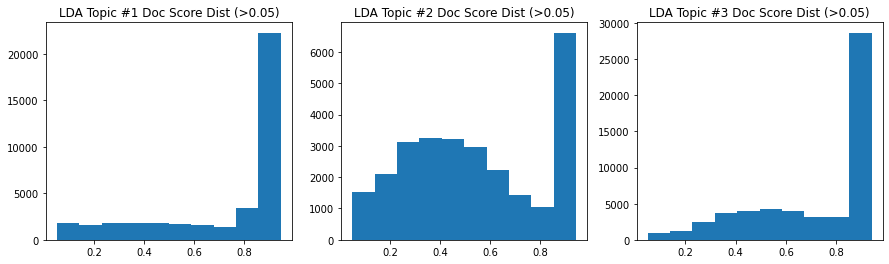

In [135]:
# LDA Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.05])
    plt.title('LDA Topic #{} Doc Score Dist (>0.05)'.format(i+1))
plt.show()

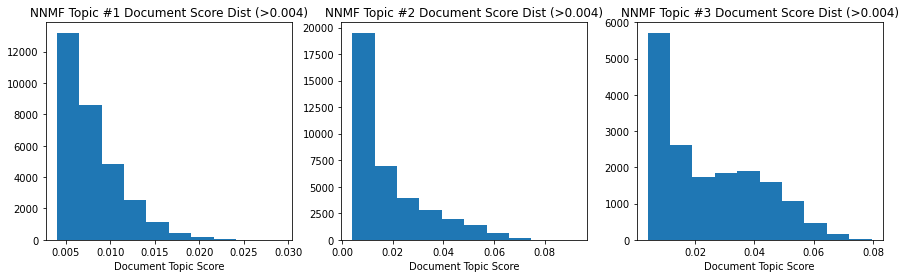

In [136]:
# NNMF Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.004])
    plt.title('NNMF Topic #{} Document Score Dist (>0.004)'.format(i+1))
    plt.xlabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Distributions.png', transparent = True)
plt.show()

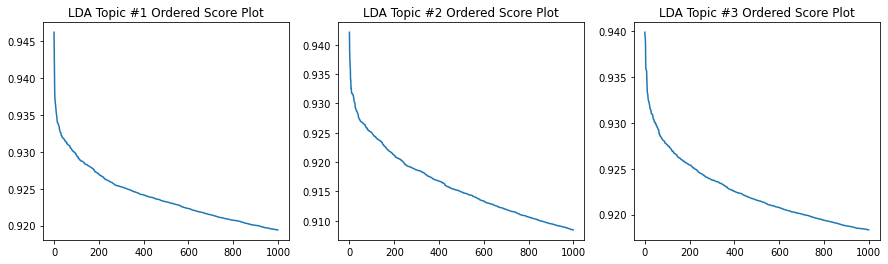

In [137]:
# LDA Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('LDA Topic #{} Ordered Score Plot'.format(i+1))
plt.show()

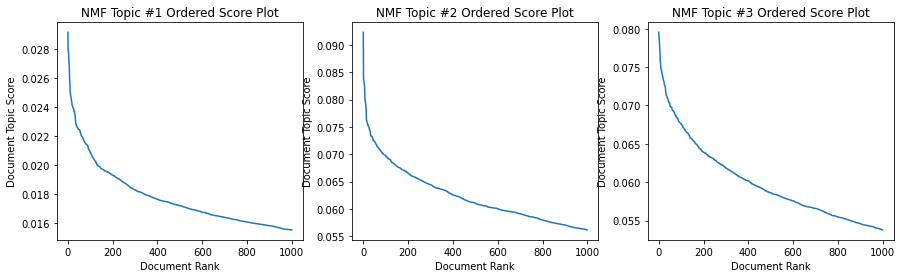

In [138]:
# NMF Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('NMF Topic #{} Ordered Score Plot'.format(i+1))
    plt.xlabel('Document Rank')
    plt.ylabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Elbows.png', transparent = True)
plt.show()

In [139]:
import pandas as pd
import numpy as np
import re
import spacy
from functools import reduce
from operator import add
import string
import re
import multiprocessing as mp

### Below is all the code necessary to clean the data into useable form for modeling.
'''
# Loading Data
allrecipes_raw = pd.read_json('../__DATA__/recipes_raw/recipes_raw_nosource_ar.json')
epicurious_raw = pd.read_json('../__DATA__/recipes_raw/recipes_raw_nosource_epi.json')
foodnetwork_raw = pd.read_json('../__DATA__/recipes_raw/recipes_raw_nosource_fn.json')

allrecipes = allrecipes_raw.copy().T.reset_index().drop(columns = ['index'])
epicurious = epicurious_raw.copy().T.reset_index().drop(columns = ['index'])
foodnetwork = foodnetwork_raw.copy().T.reset_index().drop(columns = ['index'])
recipes = pd.concat([allrecipes, epicurious, foodnetwork]).reset_index(drop=True) # Concat does not reset indices

# Cleaning
null_recs = recipes.copy().drop(columns = 'picture_link').T.isna().any()
rows_to_drop = recipes[null_recs].index
recipes = recipes.drop(index = rows_to_drop).reset_index(drop = True)

nc_ingred_index = [index for i, index in zip(recipes['ingredients'], recipes.index) if all(j.isdigit() or j in string.punctuation for j in i)]
nc_title_index = [index for i, index in zip(recipes['title'], recipes.index) if all(j.isdigit() or j in string.punctuation for j in i)]
nc_instr_index = [index for i, index in zip(recipes['instructions'], recipes.index) if all(j.isdigit() or j in string.punctuation for j in i)]

index_list = [nc_ingred_index, nc_title_index, nc_instr_index]

inds_to_drop = set(reduce(add, index_list))
print(len(inds_to_drop))
recipes = recipes.drop(index=inds_to_drop).reset_index(drop=True)
recipes.shape

empty_instr_ind = [index for i, index in zip(recipes['instructions'], recipes.index) if len(i) < 20]
recipes = recipes.drop(index = empty_instr_ind).reset_index(drop=True)

ingredients = []
for ing_list in recipes['ingredients']:
    clean_ings = [ing.replace('ADVERTISEMENT','').strip() for ing in ing_list]
    if '' in clean_ings:
        clean_ings.remove('')
    ingredients.append(clean_ings)
recipes['ingredients'] = ingredients

recipes['ingredient_text'] = ['; '.join(ingredients) for ingredients in recipes['ingredients']]
recipes['ingredient_text'].head()

recipes['ingredient_count'] = [len(ingredients) for ingredients in recipes['ingredients']]

all_text = recipes['title'] + ' ' + recipes['ingredient_text'] + ' ' + recipes['instructions']

def clean_text(documents):
    cleaned_text = []
    for doc in documents:
        doc = doc.translate(str.maketrans('', '', string.punctuation)) # Remove Punctuation
        doc = re.sub(r'\d+', '', doc) # Remove Digits
        doc = doc.replace('\n',' ') # Remove New Lines
        doc = doc.strip() # Remove Leading White Space
        doc = re.sub(' +', ' ', doc) # Remove multiple white spaces
        cleaned_text.append(doc)
    return cleaned_text

cleaned_text = clean_text(all_text)

# Testing Strategies and Code
nlp = spacy.load('en')
' '.join([token.lemma_ for token in nlp(cleaned_text[2]) if not token.is_stop])

def text_tokenizer_mp(doc):
    tok_doc = ' '.join([token.lemma_ for token in nlp(doc) if not token.is_stop])
    return tok_doc

# Parallelzing tokenizing process
pool = mp.Pool(mp.cpu_count())
tokenized_text = pool.map(text_tokenizer_mp, [doc for doc in cleaned_text])
'''

# Creating TF-IDF Matrices and recalling text dependencies

'''import text_tokenized.csv here to'''

# TF-IDF vectorizer instance
'''vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))'''

'''text_tfidf = vectorizer.fit_transform(tokenized_text)'''

'text_tfidf = vectorizer.fit_transform(tokenized_text)'

In [140]:
# Set All Recommendation Model Parameters
N_topics = 50             # Number of Topics to Extract from corpora
N_top_docs = 200          # Number of top documents within each topic to extract keywords
N_top_words = 25          # Number of keywords to extract from each topic
N_docs_categorized = 2000 # Number of top documents within each topic to tag 
N_neighbor_window = 4     # Length of word-radius that defines the neighborhood for
                          # each word in the TextRank adjacency table

# Query Similarity Weights
w_title = 0.2
w_text = 0.3
w_categories = 0.5
w_array = np.array([w_title, w_text, w_categories])

# Recipe Stopwords: for any high volume food recipe terminology that doesn't contribute
# to the searchability of a recipe. This list must be manually created.
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','teaspoons','tablespoon',
                   'tablespoons','C','F']

In [141]:
# Renaming Data Dependencies
topic_transformed_matrix = text_nmf
root_text_data = cleaned_text

In [142]:
from itertools import repeat

#recipes['tag_list'] = [[] for i in repeat(None, recipes.shape[0])]

def topic_docs_4kwsummary(topic_document_scores, root_text_data):
    '''Gathers and formats the top recipes in each topic'''
    text_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_top_docs].index
    text_4kwsummary = pd.Series(root_text_data)[text_index]
    return text_4kwsummary

def generate_filter_kws(text_list):
    '''Filters out specific parts of speech and stop words from the list of potential keywords'''
    parsed_texts = nlp(' '.join(text_list)) 
    kw_filts = set([str(word) for word in parsed_texts 
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and word.lemma_ not in recipe_stopwords])
    return list(kw_filts), parsed_texts

def generate_adjacency(kw_filts, parsed_texts):
    '''Tabulates counts of neighbors in the neighborhood window for each unique word'''
    adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
    for i, word in enumerate(parsed_texts):
        if any ([str(word) == item for item in kw_filts]):
            end = min(len(parsed_texts), i+N_neighbor_window+1) # Neighborhood Window Utilized Here
            nextwords = parsed_texts[i+1:end]
            inset = [str(x) in kw_filts for x in nextwords]
            neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
            if neighbors:
                adjacency.loc[str(word), neighbors] += 1
    return adjacency
                
def generate_wordranks(adjacency):
    '''Runs TextRank on adjacency table'''
    nx_words = nx.from_numpy_matrix(adjacency.values)
    ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)
    return ranks

def generate_tag_list(ranks):
    '''Uses TextRank ranks to return actual key words for each topic in rank order'''
    rank_values = [i for i in ranks.values()]
    ranked = pd.DataFrame(zip(rank_values, list(kw_filts))).sort_values(by=0,axis=0,ascending=False)
    kw_list = ranked.iloc[:N_top_words,1].to_list()
    return kw_list

# Master Function utilizing all above functions
def generate_tags(topic_document_scores, root_text_data):
    text_4kwsummary = topic_docs_4kwsummary(topic_document_scores, root_text_data)
    kw_filts, parsed_texts = generate_filter_kws(text_4kwsummary)
    adjacency = generate_adjacency(kw_filts, parsed_texts)
    ranks = generate_wordranks(adjacency)
    kw_list = generate_tag_list(ranks)
    return kw_list

def generate_kw_index(topic_document_scores):
    kw_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_docs_categorized].index
    return kw_index

In [144]:
kw_index_4df

Int64Index([ 14278, 106595,  63790,   4699,  67924, 115489,  30119,   9299,
            101422,  81958,
            ...
             82488, 122021,  65764,  38400, 120390, 107471, 114931,  94562,
             80935, 105171],
           dtype='int64', length=2000)

In [202]:
# Generating Tags and distributing to relevant documents
for i in range(topic_transformed_matrix.shape[1]):
    scores = topic_transformed_matrix[:,i]
    topic_kws = generate_tags(scores, root_text_data)
    kw_index_4df = generate_kw_index(scores)
    print(kw_index_4df)
    print(topic_kws)
    for _ in kw_index_4df:
        recipes.loc[_, 'tag_list'].extend(topic_kws)
    if i%10 == 0:
        print('Topic #{} Checkpoint'.format(i))
print('done!')

Int64Index([ 14278, 106595,  63790,   4699,  67924, 115489,  30119,   9299,
            101422,  81958,
            ...
             82488, 122021,  65764,  38400, 120390, 107471, 114931,  94562,
             80935, 105171],
           dtype='int64', length=2000)
['filling', 'water', 'mixing', 'oil', 'chocolate', 'pie', 'saucepan', 'flours', 'minutes', 'fold', 'ounce', 'yolk', 'cookie', 'hour', 'cheese', 'spoon', 'wholewheat', 'line', 'spice', 'paper', 'round', 'knife', 'raspberry', 'squares', 'applesauce']
Topic #0 Checkpoint
Int64Index([ 3060, 22279, 13724,  3633, 24463,  6527,  2836,  8602,  1209,
             2270,
            ...
             2894,  9021, 80923, 27077, 23703, 38491, 14256, 27269, 10793,
            14475],
           dtype='int64', length=2000)
['spots', 'nutmeg', 'shortening', 'oats', 'lumps', 'rest', 'pour', 'cherries', 'coconut', 'consistency', 'saucepan', 'papers', 'soda', 'ginger', 'boiling', 'smooth', 'dust', 'cutter', 'beat', 'amounts', 'o', 'xinch', 'muffi

Int64Index([ 4589,  6741, 31009, 19918, 25265, 19450, 22687, 31874,  3412,
             6642,
            ...
            67146,  8223,  1690, 20231, 19023, 69756, 35293, 22667, 24020,
            26688],
           dtype='int64', length=2000)
['sheet', 'cubed', 'moist', 'blend', 'streusel', 'fingertips', 'knife', 'spoonfuls', 'chill', 'oat', 'seed', 'o', 'sheets', 'balls', 'berries', 'crown', 'Stir', 'Wrap', 'spice', 'bread', 'cranberries', 'degrees', 'top', 'powder', 'Sift']
Int64Index([ 25629,  23582,  13600,  53820,  45570,  63670, 109661,  44991,
              9004,  76892,
            ...
            116797,  31971,  29505, 118488,  73622,  77389,  59527,  44326,
             92979,  31861],
           dtype='int64', length=2000)
['whites', 'sand', 'minute', 'raspberries', 'squares', 'C', 'looks', 'sheets', 'filling', 'edges', 'consistency', 'nutmeg', 'sugars', 'vinegar', 'combine', 'tablespoons', 'cream', 'dash', 'chocolate', 'flour', 'bars', 'whisk', 'applesauce', 'apple', 'mil

Int64Index([ 53658,    652,  31322,  32180,  19142, 101744, 106231,  56894,
             56468, 113456,
            ...
             97269,  84242, 100560,  28630,  92360,  30837,  61829, 110766,
             85755, 106441],
           dtype='int64', length=2000)
['paperline', 'mixing', 'cubed', 'surface', 'xinch', 'creamy', 'spoonfuls', 'brookies', 'liners', 'oats', 'teaspoons', 'Lots', 'cheese', 'speed', 'cornmeal', 'yolk', 'tin', 'soda', 'ice', 'place', 'boil', 'fold', 'honey', 'Arrange', 'strawberries']
Int64Index([ 17781,   5447,   3345,  43441,  46472,  18663,  77324,  12255,
             49677,  49181,
            ...
            103792,  19734, 112072,  30771,  46349, 109325,  19232, 102459,
            115178,  31334],
           dtype='int64', length=2000)
['dash', 'sauce', 'Wrap', 'crown', 'maraschino', 'jam', 'zucchini', 'blend', 'Fold', 'seed', 'bottom', 'room', 'spray', 'well', 'degree', 'nutmeg', 'cream', 'ounce', 'ground', 'yogurt', 'Mix', 'shape', 'jellyroll', 'cubed',

Int64Index([ 17730,  76744,  17839,  98226,   9362,  52610,  31339,  87562,
             49121,  44858,
            ...
             91286,  85144,  43391, 110960,  49653,  73453,  35986, 117929,
             33524,  10964],
           dtype='int64', length=2000)
['soda', 'hour', 'boiling', 'corn', 'milk', 'liners', 'yolks', 'Line', 'teaspoonfuls', 'base', 'bottoms', 'blueberries', 'plums', 'stir', 'pecans', 'tin', 'buckwheat', 'Bring', 'tartar', 'spice', 'chips', 'lumps', 'amount', 'mixing', 'wheat']
done!


In [34]:
recipes.loc[14278,'tag_list'].extend(['filling', 'water', 'mixing', 'oil', 'chocolate', 'pie', 'saucepan', 'flours', 'minutes', 'fold', 'ounce', 'yolk', 'cookie', 'hour', 'cheese', 'spoon', 'wholewheat', 'line', 'spice', 'paper', 'round', 'knife', 'raspberry', 'squares', 'applesauce'])

AttributeError: 'str' object has no attribute 'extend'

In [204]:
recipes.to_csv('tagged_recipes_df.csv')


In [ ]:
recipes.to_csv('tagged_recipes_df.csv')


In [33]:
recipes.loc[kw_index_4df]

NameError: name 'kw_index_4df' is not defined

In [176]:
test=recipes.copy(deep=True)


In [197]:
recipes.drop(['tag_list'], axis = 1, inplace = True) 


In [199]:
recipes['tag_list'] = np.empty((len(recipes), 0)).tolist()


In [224]:
recipes

,title,ingredients,instructions,picture_link,ingredient_text,ingredient_count,tag_list,tags
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves, 2...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S,"4 skinless, boneless chicken breast halves; 2 ...",5,[],
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,2 (10.75 ounce) cans condensed cream of mushro...,4,"[whites, sand, minute, raspberries, squares, C...",whites sand minute raspberries squares C looks...
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar, 1/2 cup ketchup, ...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,1/2 cup packed brown sugar; 1/2 cup ketchup; 1...,10,[],
3,Best Chocolate Chip Cookies,"[1 cup butter, softened, 1 cup white sugar, 1 ...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,"1 cup butter, softened; 1 cup white sugar; 1 c...",11,"[spots, nutmeg, shortening, oats, lumps, rest,...",spots nutmeg shortening oats lumps rest pour c...
4,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta, 3 cups fre...",Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm,8 ounces whole wheat rotini pasta; 3 cups fres...,13,"[moist, wire, raspberry, temperature, corn, fl...",moist wire raspberry temperature corn flax cho...
...,...,...,...,...,...,...,...,...
122906,Summer Corn Salad,"[4 ears fresh corn, 2 heads Belgian endive, 2 ...",Watch how to make this recipe.\nPreheat a gril...,G9XPV1I0nULIbwS76f..0AIq2DsfI3u,4 ears fresh corn; 2 heads Belgian endive; 2 t...,10,"[water, paper, candy, icing, mixer, layer, spo...",water paper candy icing mixer layer spoonfuls ...
122907,Zucchini Stuffed Tomatoes,"[4 large plum tomatoes, Salt and sugar, 1 1/2 ...",Preheat the broiler. Cut the tomatoes in 1/2 c...,nA7V5iQqaFcIEQQ0/MKqVdUioieXjPu,4 large plum tomatoes; Salt and sugar; 1 1/2 p...,9,"[cookies, jam, hour, layer, peanut, sand, Spoo...",cookies jam hour layer peanut sand Spoon teasp...
122908,Pepper Pasta Quick Cook,"[3 tablespoons olive oil, 2 tablespoons unsalt...",Heat the oil and butter in a large skillet ove...,None,3 tablespoons olive oil; 2 tablespoons unsalte...,17,[],
122909,Chocolate Cake with Armagnac Ice Cream,"[8 ounces butter, 8 ounces bittersweet chocola...",Preheat oven to 350 degrees. On the top half o...,None,8 ounces butter; 8 ounces bittersweet chocolat...,8,[],


In [156]:
test.loc[14278]

title                                              Black Olive Spread
ingredients         [1 (10 ounce) can black olives, 3 tablespoons ...
instructions        Place olives, Parmesan cheese, and garlic (if ...
picture_link                          C1osyqT9mRKLZjaVAVhvY8WO//35jgu
ingredient_text     1 (10 ounce) can black olives; 3 tablespoons f...
ingredient_count                                                    4
xyz                                                             hello
Name: 14278, dtype: object

In [31]:
recipes.loc[:5,'tag_list']


0                                                   []
1    ['whites', 'sand', 'minute', 'raspberries', 's...
2                                                   []
3    ['spots', 'nutmeg', 'shortening', 'oats', 'lum...
4    ['moist', 'wire', 'raspberry', 'temperature', ...
5    ['whipping', 'sift', 'lemon', 'heat', 'flour',...
Name: tag_list, dtype: object

In [28]:
recipes['tags'] = [' '.join(tags) for tags in recipes['tag_list']]

In [32]:
recipes.loc[:5,'tags']


0                                                  NaN
1    whites sand minute raspberries squares C looks...
2                                                  NaN
3    spots nutmeg shortening oats lumps rest pour c...
4    moist wire raspberry temperature corn flax cho...
5    whipping sift lemon heat flour sides apple tub...
Name: tags, dtype: object

In [226]:
recipes.to_csv('tagged_recipes_df.csv')


In [30]:
recipes = pd.read_csv ('tagged_recipes_df.csv')


# Querying algorithm

In [19]:
recipes.columns


Index(['title', 'ingredients', 'instructions', 'picture_link',
       'ingredient_text', 'ingredient_count', 'tag_list', 'tags'],
      dtype='object')

In [17]:
recipes=recipes.drop(['Unnamed: 0'], axis=1)

In [18]:
recipes

,title,ingredients,instructions,picture_link,ingredient_text,ingredient_count,tag_list,tags
0,Slow Cooker Chicken and Dumplings,"['4 skinless, boneless chicken breast halves',...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S,"4 skinless, boneless chicken breast halves; 2 ...",5,[],NaN
1,Awesome Slow Cooker Pot Roast,['2 (10.75 ounce) cans condensed cream of mush...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,2 (10.75 ounce) cans condensed cream of mushro...,4,"['whites', 'sand', 'minute', 'raspberries', 's...",whites sand minute raspberries squares C looks...
2,Brown Sugar Meatloaf,"['1/2 cup packed brown sugar', '1/2 cup ketchu...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,1/2 cup packed brown sugar; 1/2 cup ketchup; 1...,10,[],NaN
3,Best Chocolate Chip Cookies,"['1 cup butter, softened', '1 cup white sugar'...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,"1 cup butter, softened; 1 cup white sugar; 1 c...",11,"['spots', 'nutmeg', 'shortening', 'oats', 'lum...",spots nutmeg shortening oats lumps rest pour c...
4,Homemade Mac and Cheese Casserole,"['8 ounces whole wheat rotini pasta', '3 cups ...",Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm,8 ounces whole wheat rotini pasta; 3 cups fres...,13,"['moist', 'wire', 'raspberry', 'temperature', ...",moist wire raspberry temperature corn flax cho...
...,...,...,...,...,...,...,...,...
122906,Summer Corn Salad,"['4 ears fresh corn', '2 heads Belgian endive'...",Watch how to make this recipe.\nPreheat a gril...,G9XPV1I0nULIbwS76f..0AIq2DsfI3u,4 ears fresh corn; 2 heads Belgian endive; 2 t...,10,"['water', 'paper', 'candy', 'icing', 'mixer', ...",water paper candy icing mixer layer spoonfuls ...
122907,Zucchini Stuffed Tomatoes,"['4 large plum tomatoes', 'Salt and sugar', '1...",Preheat the broiler. Cut the tomatoes in 1/2 c...,nA7V5iQqaFcIEQQ0/MKqVdUioieXjPu,4 large plum tomatoes; Salt and sugar; 1 1/2 p...,9,"['cookies', 'jam', 'hour', 'layer', 'peanut', ...",cookies jam hour layer peanut sand Spoon teasp...
122908,Pepper Pasta Quick Cook,"['3 tablespoons olive oil', '2 tablespoons uns...",Heat the oil and butter in a large skillet ove...,NaN,3 tablespoons olive oil; 2 tablespoons unsalte...,17,[],NaN
122909,Chocolate Cake with Armagnac Ice Cream,"['8 ounces butter', '8 ounces bittersweet choc...",Preheat oven to 350 degrees. On the top half o...,NaN,8 ounces butter; 8 ounces bittersweet chocolat...,8,[],NaN


In [38]:
# Creating TF-IDF Matrices and recalling text dependencies
from sklearn.feature_extraction.text import TfidfVectorizer
from functools import reduce
from operator import add
'''import text_tokenized.csv here'''
recipes = pd.read_csv ('tagged_recipes_df.csv')
# print (df)
# TF-IDF vectorizer instance
vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))

text_tfidf = vectorizer.fit_transform(tokenized_text)
title_tfidf = vectorizer.transform(recipes['title'])
# text_tfidf    <== Variable with recipe ingredients and instructions
tags_tfidf = vectorizer.transform(recipes['tags'].values.astype('U'))
# recipes   <== DataFrame; For indexing and printing recipes

# Query Similarity Weights
w_title = .2
w_text = .3
w_categories = .5

In [36]:
def qweight_array(query_length, qw_array = [1]):
    '''Returns descending weights for ranked query ingredients'''
    if query_length > 1:
        to_split = qw_array.pop()
        split = to_split/2
        qw_array.extend([split, split])
        return qweight_array(query_length - 1, qw_array)
    else:
        return np.array(qw_array)

def ranked_query(query):
    '''Called if query ingredients are ranked in order of importance.
    Weights and adds each ranked query ingredient vector.'''
    query = [[q] for q in query]      # place words in seperate documents
    q_vecs = [vectorizer.transform(q) for q in query] 
    qw_array = qweight_array(len(query),[1])
    q_weighted_vecs = q_vecs * qw_array
    q_final_vector = reduce(np.add,q_weighted_vecs)
    return q_final_vector

def overall_scores(query_vector):
    '''Calculates Query Similarity Scores against recipe title, instructions, and keywords.
    Then returns weighted averages of similarities for each recipe.'''
    final_scores = title_tfidf*query_vector.T*w_title
    final_scores += text_tfidf*query_vector.T*w_text
    final_scores += tags_tfidf*query_vector.T*w_categories
    return final_scores

def print_recipes(index, query, recipe_range):
    '''Prints recipes according to query similary ranks'''
    print('Search Query: {}\n'.format(query))
    for i, index in enumerate(index, recipe_range[0]):
        print('Recipe Rank: {}\t'.format(i+1),recipes.loc[index, 'title'],'\n')
        print('Ingredients:\n{}\n '.format(recipes.loc[index, 'ingredient_text']))
        print('Instructions:\n{}\n'.format(recipes.loc[index, 'instructions']))
        
def Search_Recipes(query, query_ranked=False, recipe_range=(0,5)):
    '''Master Recipe Search Function'''
    if query_ranked == True:
        q_vector = ranked_query(query)
    else:
        q_vector = vectorizer.transform([' '.join(query)])
    recipe_scores = overall_scores(q_vector)
    sorted_index = pd.Series(recipe_scores.toarray().T[0]).sort_values(ascending = False)[recipe_range[0]:recipe_range[1]].index
    return print_recipes(sorted_index, query, recipe_range)

In [39]:
query = ['cheese']
Search_Recipes(query, query_ranked=True, recipe_range=(0,3))

Search Query: ['cheese']

Recipe Rank: 1	 Three-Cheese Grilled Cheese 

Ingredients:
4 tablespoons unsalted butter, softened; 8 slices sourdough bread; 4 slices cheddar cheese (about 3 ounces); 4 slices Swiss cheese (about 3 ounces); 4 slices American cheese (about 3 ounces)
 
Instructions:
Spread the butter on one side of each bread slice. Heat a large skillet over medium heat. Put 2 bread slices in the skillet, buttered-side down. Layer a slice each of cheddar, Swiss and American cheese on each piece of bread, then cover with another bread slice, buttered-side up.
Cook, pressing the sandwiches occasionally with a spatula, until the cheese melts and the bread is golden, 3 to 4 minutes per side. Repeat to make 2 more sandwiches. Slice each sandwich diagonally in half, then return to the hot pan, cut-side down, to create a crust on the cheese.
Photograph by Andrew Mccaul

Recipe Rank: 2	 Cheese Dip I 

Ingredients:
2 (8 ounce) packages cream cheese, softened; 2 (5 ounce) containers shar